#REGRESSION

Instructions:
1. Explorez cet ensemble de données en utilisant ce que vous avez appris en prétraitement et en visualisation de données

2. Rédigez un paragraphe sélectionnant les fonctionnalités les plus importantes (sélection des fonctionnalités).

3. Divisez votre ensemble de données en un ensemble d'entraînement et un ensemble de test.

4. Appliquez la régression linéaire à votre ensemble d'entraînement.

5. Tracez la régression linéaire.

5. Mesurez les performances de la régression linéaire à l'aide de l'ensemble de tests.

6. Appliquez une régression linéaire multiple et comparez-la au modèle linéaire.

7. Appliquez la régression polynomiale et comparez-la à la régression linéaire et multilinéaire.

Remarque : Chaque résultat doit être interprété et justifié. Écrivez vos interprétations dans une démarque.

##Exploration et Visualisation

1. Explorons cet ensemble de données en utilisant ce que vous avez appris en prétraitement et en visualisation de données

In [86]:
#Importing libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#seaborn + matplotlib for graphical plot
#seaborn allows to have advanced graphical content
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [87]:
data= pd.read_csv('/content/kc_house_data.csv')

In [88]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [89]:
data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [90]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [91]:
data.shape

(21613, 21)

Now, Our dataframe contains 21 features and 21613 samples after removing the Id col

h(X)=thet0+theta1x1+.....+theta80x80

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [93]:
#Verifions si on des valeurs manquantes
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Donc dans notre dataset, nous n'avons pas de données manquantes

In [94]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



##Feature Engeneering

2 Rédigeons un paragraphe sélectionnant les fonctionnalités les plus importantes (sélection des fonctionnalités).

Dans cette section, nous travaillons sur la corrélation des caractéristiques avec la cible prédite (SalePrice).

Nous évaluerons la pertinence de chaque caractéristique afin de choisir celles qui ont le plus d'impact sur notre modèle.

Nous avons deux approches :

Manuellement : il s'agit d'évaluer le comportement entre le prix de vente et l'élément évalué. Cela prend beaucoup de temps si l'on a beaucoup de caractéristiques (dans notre cas, 80 caractéristiques).
Automatiquement : consiste à utiliser une matrice de corrélation qui calcule les paires entre toutes les caractéristiques.
Dans notre contexte, nous utiliserons la deuxième approche car nous gagnons beaucoup de temps lors du processus d'ingénierie des caractéristiques.

Nous visualisons rapidement l'ACP du prix de vente.

In [95]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Le Prix max de vente est 7700000

Le prix min de vente est 75000

Maintenant, nous analyserons les points aberrants dans le prix.

<ipython-input-96-86ccc8337deb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

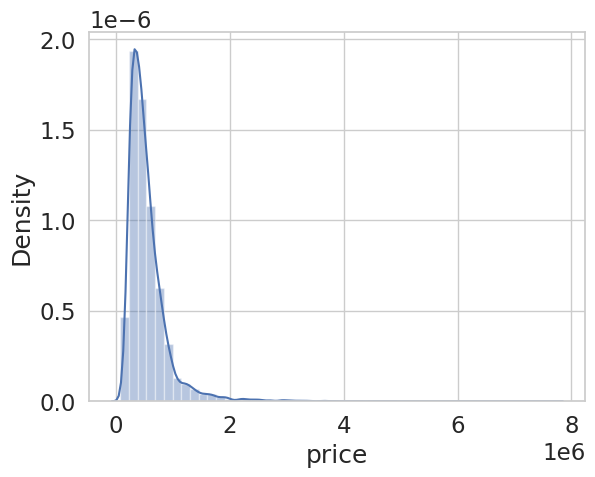

In [96]:
#We use seaborn
#change the plot configuration such as the style and size
sns.set(style='whitegrid', font_scale=1.5)
#We use the distplot() function to plot the distribution of the SalePrice
sns.distplot(data['price'])

Le prix de vente  se situe entre 1000 000 et 150 000 euros.

Pour un prix élevé, il y aura beaucoup de points aberrants.

###Toutes les caractéristiques basées sur la matrice de corrélation

La matrice de corrélation permet de calculer la corrélation entre plusieurs variables. En général, les valeurs de corrélation sont comprises entre -1 et 1.

Forte corrélation : proche de 1 => la variable observée a un impact sur la cible prédite.

Faible corrélation : proche de 0 ou -1 => la variable observée n'a pas d'impact sur la cible prédite.

Pour l'apprentissage automatique, en raison de la complexité temporelle et des exigences du matériel. Nous utilisons les caractéristiques ayant des valeurs de corrélation élevées.

<ipython-input-97-b31ce8a6fa54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


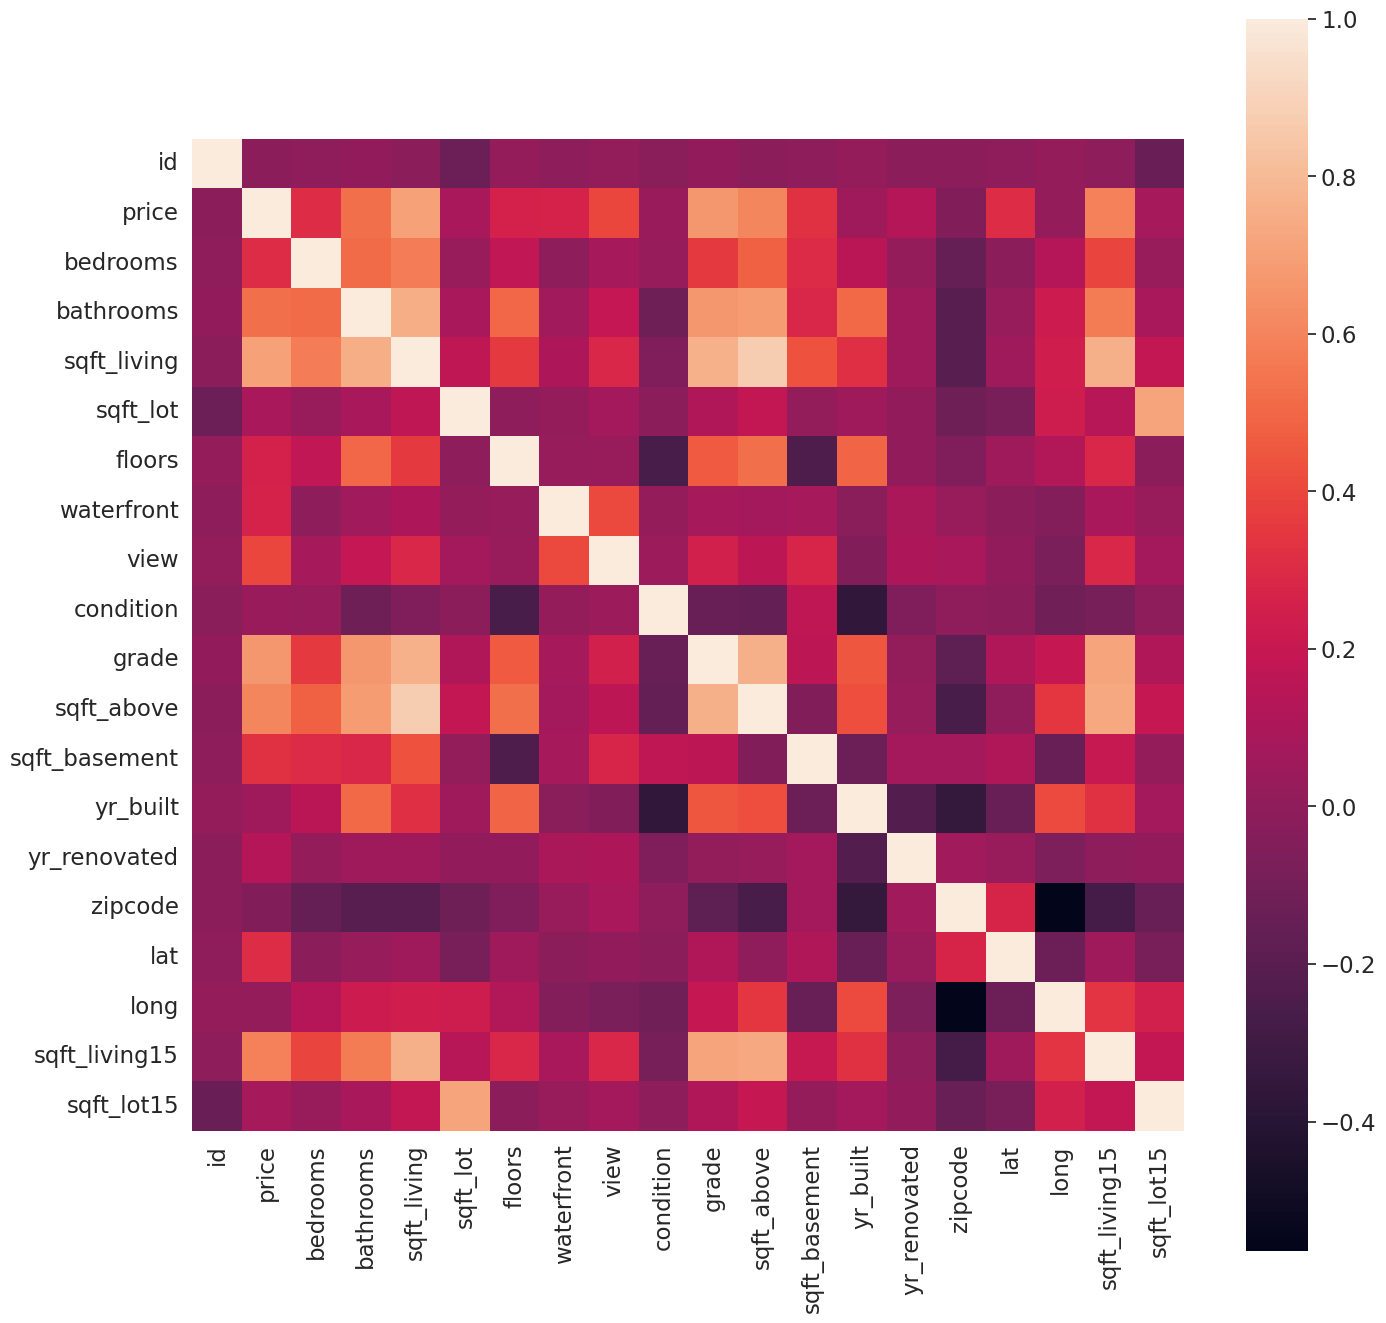

In [97]:
corrmat = data.corr()
plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, square=True);

La figure représente la matrice de corrélation de toutes les caractéristiques.

La taille de la matrice de corrélation est de 21 x 21 car nous devons croiser 21caractéristiques avec elles.

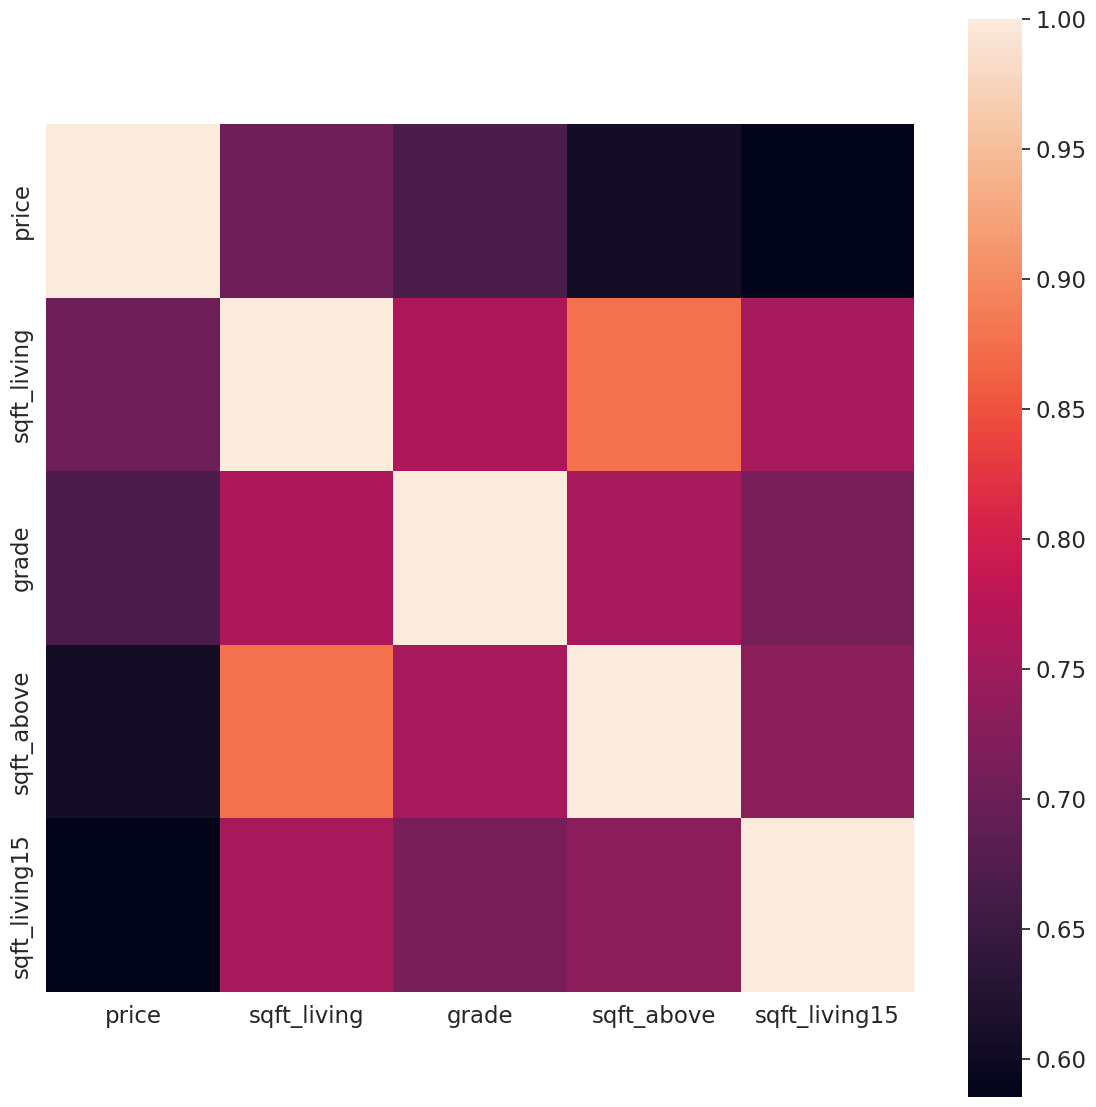

In [98]:
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
plt.subplots(figsize=(14, 14))
sns.heatmap(data[cols].corr(), square=True);

Dans cette matrice, nous avons les 5 caractéristiques les plus corrélées :

sqft_living

grade

sqft_above

sqft_living15

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


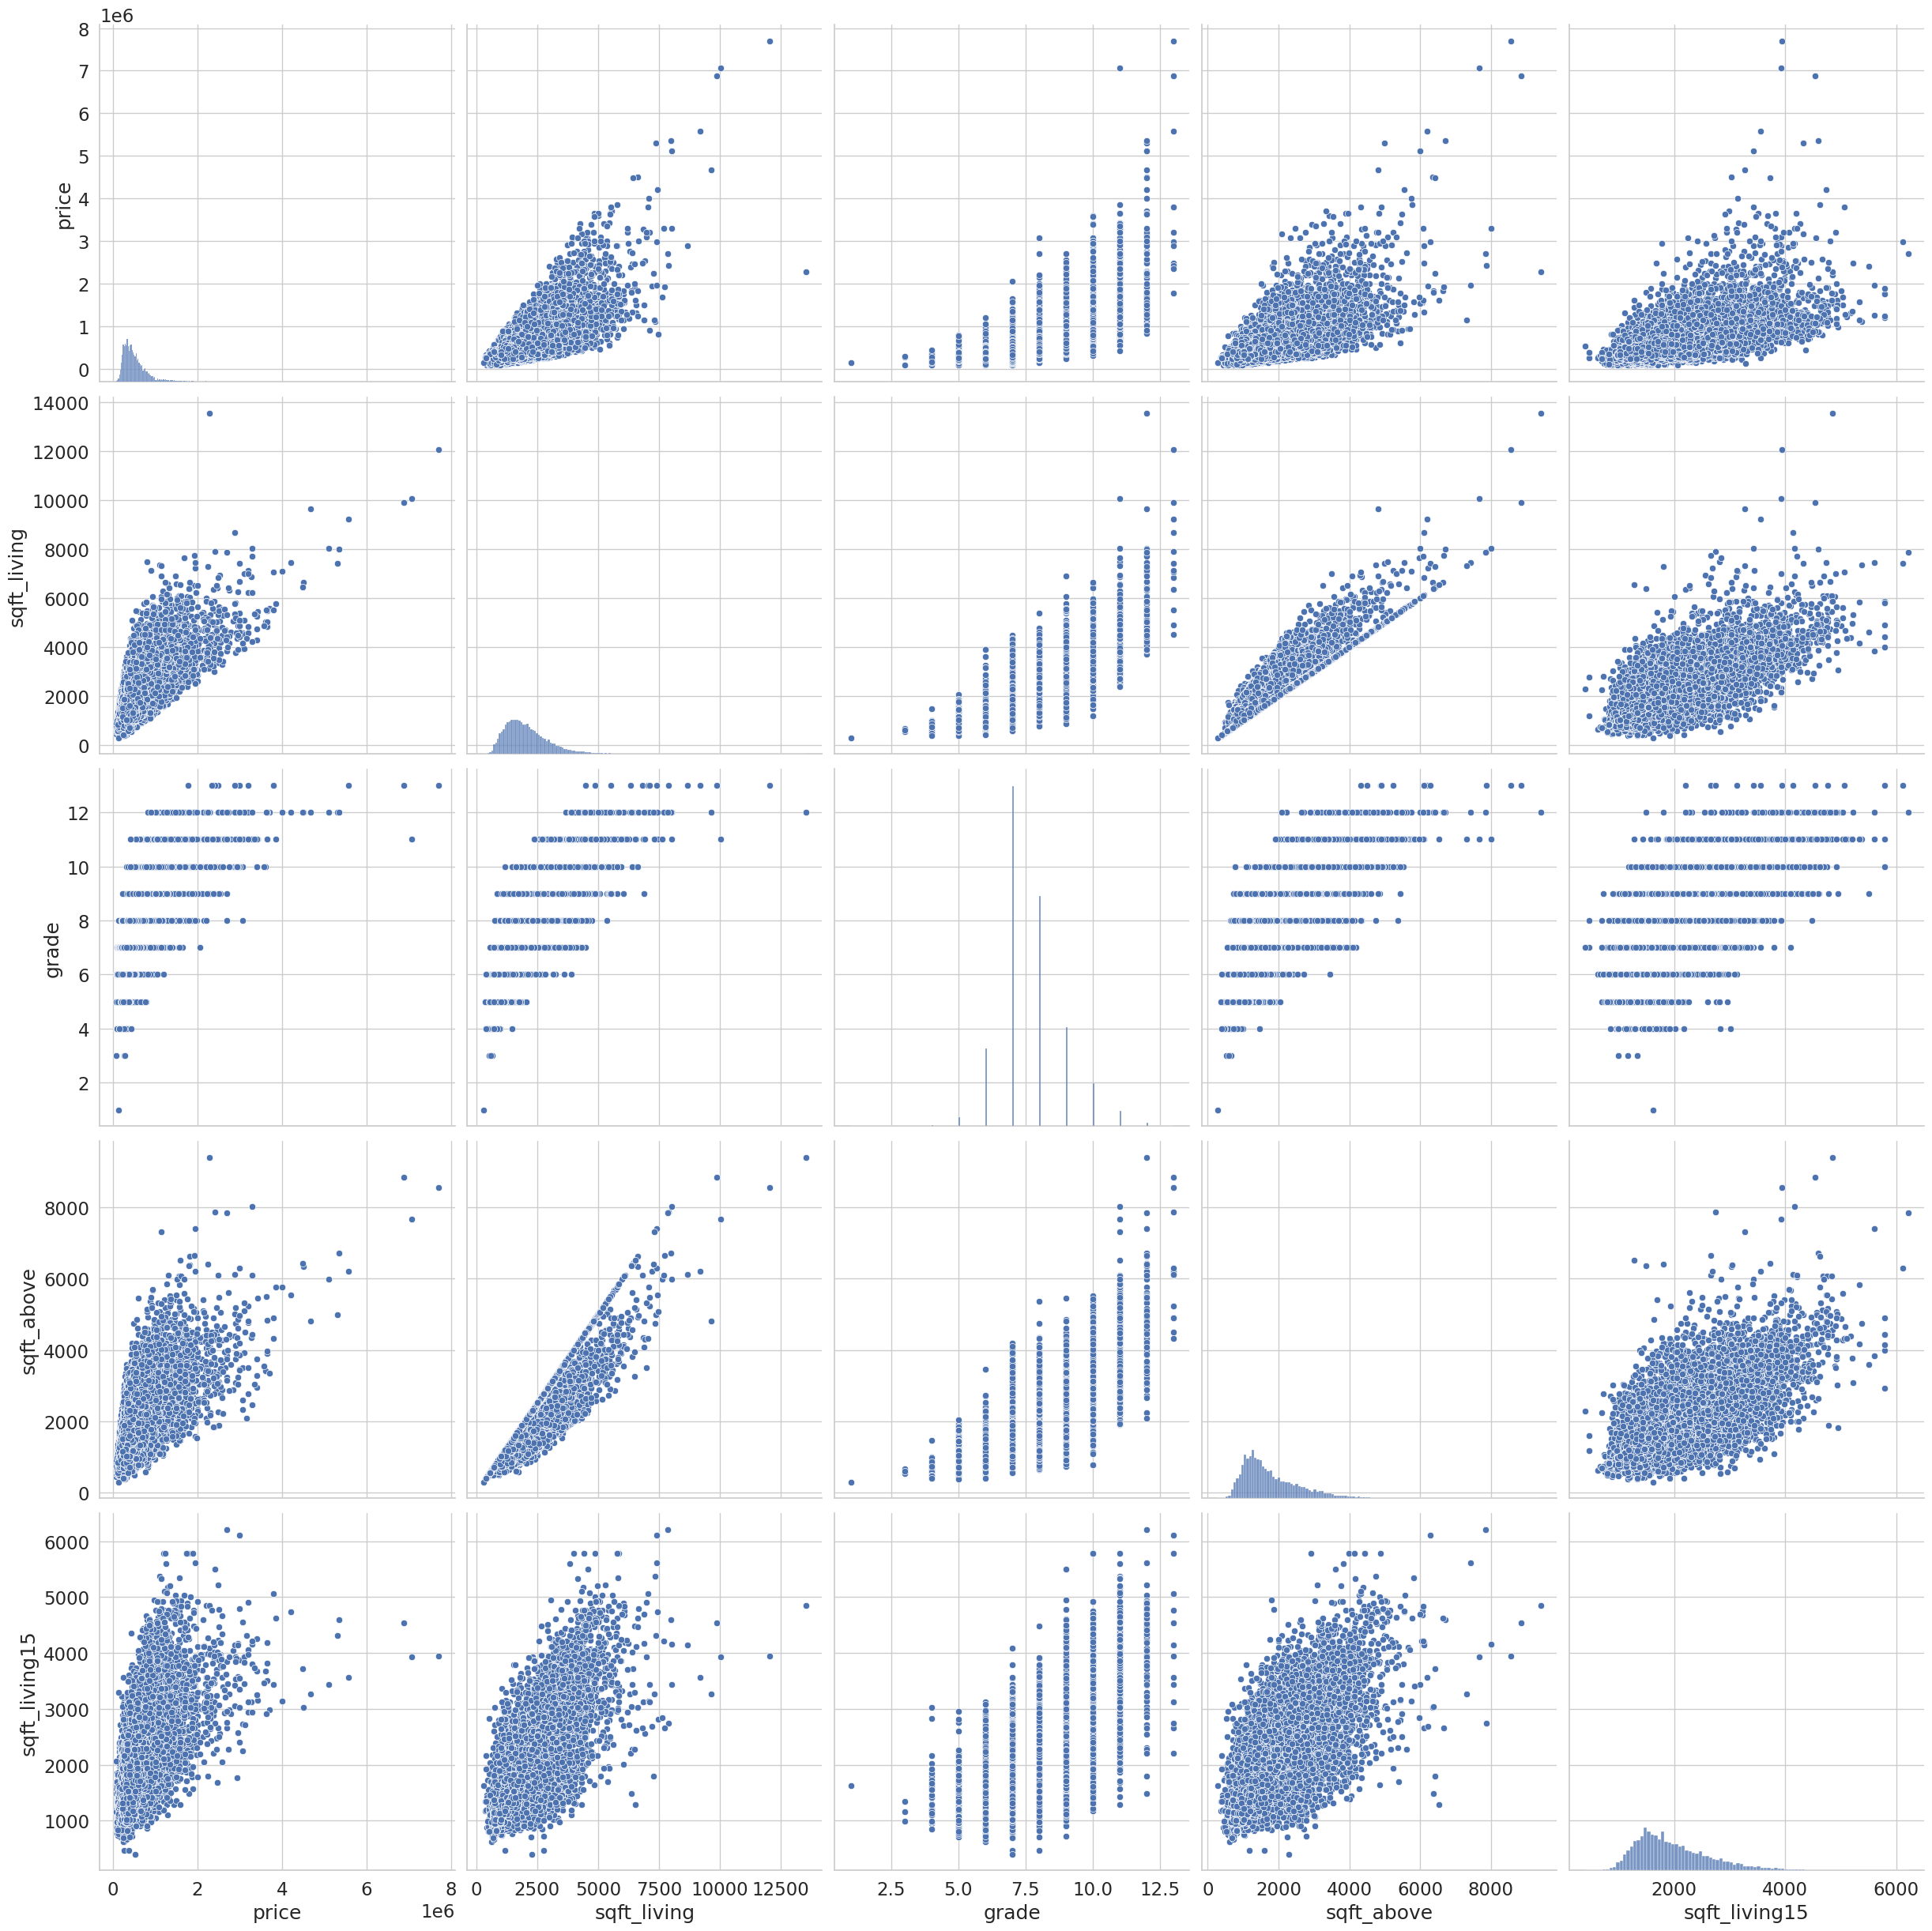

In [99]:
cols = ['price', 'sqft_living', 'grade', 'sqft_above','sqft_living15']
sns.pairplot(data[cols], size = 5);

Nous observons que nous avons l'impact des caractéristiques sur la cible prédite (price).

Nettoyons les valeurs manquantes

In [100]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent


Donc ceci vient de confirmer ce nous avons noté avec la methode data.isnull().sum() que nous n'avons pas valeurs manquantes sur les caracteristiques selectionnés

##Division du dataset

3. Divisons notre ensemble de données en un ensemble d'entraînement et un ensemble de test.



Nous diviserons l'ensemble de données en deux sous-ensembles : 80 % pour l'ensemble de formation et 20 % pour l'ensemble de test.

Remarque : Dans certains cas, nous pouvons ajouter l'ensemble de validation.

Dans ce contexte, il est recommandé de diviser l'ensemble de données en trois sous-ensembles : 70 % => formation 20 % => test 10 % => validation.

Remarque : On parle d'ensemble de validation lorsque l'on passe à la production du modèle.

In [101]:
#x= data[["sqft_living", "grade", "sqft_above","sqft_living15"]].values[:,np.newaxis]
#On pouvais l'appliquer si c'etait d'un seul feature
#y= data["price"].values
data_train, data_test = train_test_split(data, train_size=0.8, test_size=0.2)

In [102]:
print("size of the training set", data_train.shape)
print("size of the testing set", data_test.shape)


size of the training set (17290, 21)
size of the testing set (4323, 21)


L' ensemble de formation contient 17290 échantillons et l'ensemble de test 4323.

##Regression Lineaire

4. Appliquons la régression linéaire à notre ensemble d'entraînement.

In [103]:
#extract x and y from our data
#x_train = data_train[["sqft_living", "grade", "sqft_above","sqft_living15"]]
#y_train = data_train['price']

In [104]:
#Ici nous appliquons la regression sur une seul feature
x_train=data_train["sqft_living"].values[:,np.newaxis]
y_train=data_train["price"].values

In [105]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data

LinearRegression()

 ## Traçons la régression linéaire.

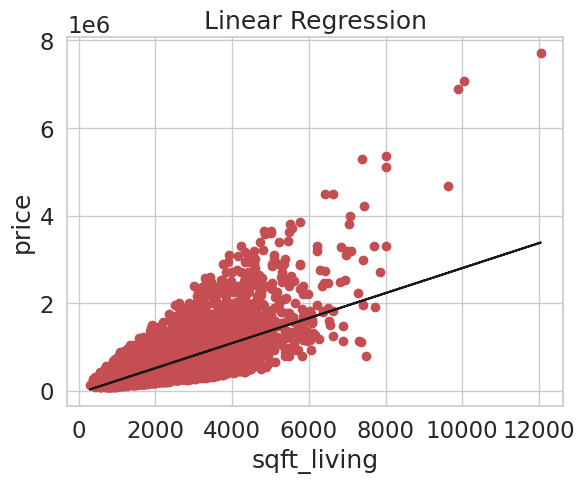

In [106]:
plt.scatter(x_train,y_train,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_train,model.predict(x_train),color="k")
plt.show()

## 5. Mesurons les performances de la régression linéaire à l'aide de l'ensemble de tests.

In [107]:
x_test=data_test["sqft_living"].values[:,np.newaxis]
y_test=data_test["price"].values

In [108]:
predicted=model.predict(x_test) #testing our model’s performance

In [109]:
#find the learning parameters theta0 and theta1
theta0=model.intercept_
theta1=model.coef_
print("The learning model h(x)=",round(theta0,2),"+",round(theta1[0],2),"x1")

The learning model h(x)= -53218.98 + 285.27 x1


In [110]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 64997267049.828804
R squared 0.48295637778591016


In [111]:
#Check the accurancy or Adjusted R Squared
r2_score=model.score(x_test, y_test)
print(r2_score)
print("The prediction capability of our model is ", round(r2_score*100, 2), "%")

0.48295637778591016
The prediction capability of our model is  48.3 %


Modele de prediction

In [112]:
#Make prediction on test data
y_pred = model.predict(x_test)
data_test['predicted'] = y_pred
data_test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted
19166,1136100062,20140509T000000,585000.0,4,3.25,2400,29252,2.0,0,0,...,2400,0,1982,0,98072,47.7430,-122.131,2280,45000,6.314252e+05
9415,7203220410,20140813T000000,790500.0,4,2.75,3350,5416,2.0,0,0,...,3350,0,2014,0,98053,47.6849,-122.016,3625,5637,9.024301e+05
10116,9201000030,20150313T000000,940000.0,4,2.75,3770,24897,2.0,0,2,...,2550,1220,1964,0,98075,47.5824,-122.078,2640,11502,1.022243e+06
6797,8691400010,20150327T000000,830000.0,4,3.25,3330,7809,2.0,0,0,...,3330,0,2004,0,98075,47.5977,-121.976,3100,6465,8.967248e+05
18189,7986400265,20141029T000000,770000.0,5,3.00,2370,6000,1.5,0,2,...,1340,1030,1926,2003,98107,47.6645,-122.358,1350,4500,6.228671e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,952000055,20150206T000000,530000.0,3,1.00,1500,5750,1.5,0,0,...,1050,450,1927,0,98126,47.5677,-122.376,1500,5060,3.746836e+05
8134,6430500291,20150212T000000,565000.0,3,1.00,1260,4080,1.5,0,0,...,1260,0,1928,0,98103,47.6893,-122.354,1130,3876,3.062192e+05
19304,1312900180,20150325T000000,225000.0,3,1.00,1250,7820,1.0,0,0,...,1250,0,1967,0,98001,47.3397,-122.291,1300,7920,3.033665e+05
3711,4447300008,20140923T000000,530000.0,3,1.50,1950,1963,3.0,0,0,...,1950,0,2002,0,98117,47.6904,-122.397,1590,2028,5.030544e+05


## 6. Appliquons une régression linéaire multiple et comparez-la au modèle linéaire.

Préparons les données pour la matrice

In [113]:
x0=np.ones(data_train.shape[0]) # is the bias feature (we fix to one by default)
x1=data_train['sqft_living'] #feature 1
x2=data_train['grade'] #feature 2
x3=data_train['sqft_above'] #feature 3
x4=data_train['sqft_living15'] # feature 4
y=data_train['price'] #target


#we create a matrix from the four features
x_train=np.array([x0, x1, x2, x3, x4, ]).transpose()
y_train=np.array(y)
print(x_train.shape)
print(y_train.shape)


(17290, 5)
(17290,)


In [114]:
x0=np.ones(data_test.shape[0]) # is the bias feature
x1=data_test['sqft_living'] #feature 1
x2=data_test['grade'] #feature 2
x3=data_test['sqft_above'] #feature 3
x4=data_test['sqft_living15'] # feature 4
y=data_test['price'] #target


y=data_test['price'] #target

#we create a matrix from the three features
x_test=np.array([x0, x1, x2, x3, x4]).transpose()

y_test=np.array(y)
print(x_test.shape)
print(y_test.shape)

(4323, 5)
(4323,)


Construction et entraînement du modèle
Nous entraînons le modèle sur les données x_train et y_train

In [115]:
model = LinearRegression()#build linear regression model
model.fit(x_train, y_train)#fitting the training data

LinearRegression()

In [116]:
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

acc=model.score(x_test, y_test)
print('the accuracy of our model is ', round(acc*100,2), '%')


MSE 57163947925.96977
R squared 0.545269269967269
the accuracy of our model is  54.53 %


In [117]:
acc=model.score(x_test, y_test)
print('the accuracy of our model is ', round(acc*100,2), '%')

the accuracy of our model is  54.53 %


Conclusion: En comparant les deux modeles, on conclut que le modele regression multiple est plus performant que le modele de regression lineaire.

Car la precison du modele multiple est de 54.53 % alors que celle du modele lineaire est de  48.3 %


## 7. Appliquons la régression polynomiale et comparons-la à la régression linéaire et multilinéaire.

In [127]:
x_train=data_train["sqft_living"].values[:,np.newaxis]
y_train=data_train["price"].values

In [128]:
x_test=data_test["sqft_living"].values[:,np.newaxis]
y_test=data_test["price"].values

In [129]:
#Ajoutons la librairi du modele polynomiale
from sklearn.preprocessing import PolynomialFeatures
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

In [137]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  76211821441.66437
R squared:  0.39374626038472216


Finalement ce dernier resultat vient de confirmer que le modele mutiple est le meilleur modele comparé au deux autres. Et que le modele lineaire est assez important en terme de predictions de nos resultats que le modele polynomiale qui un score de 39.37%